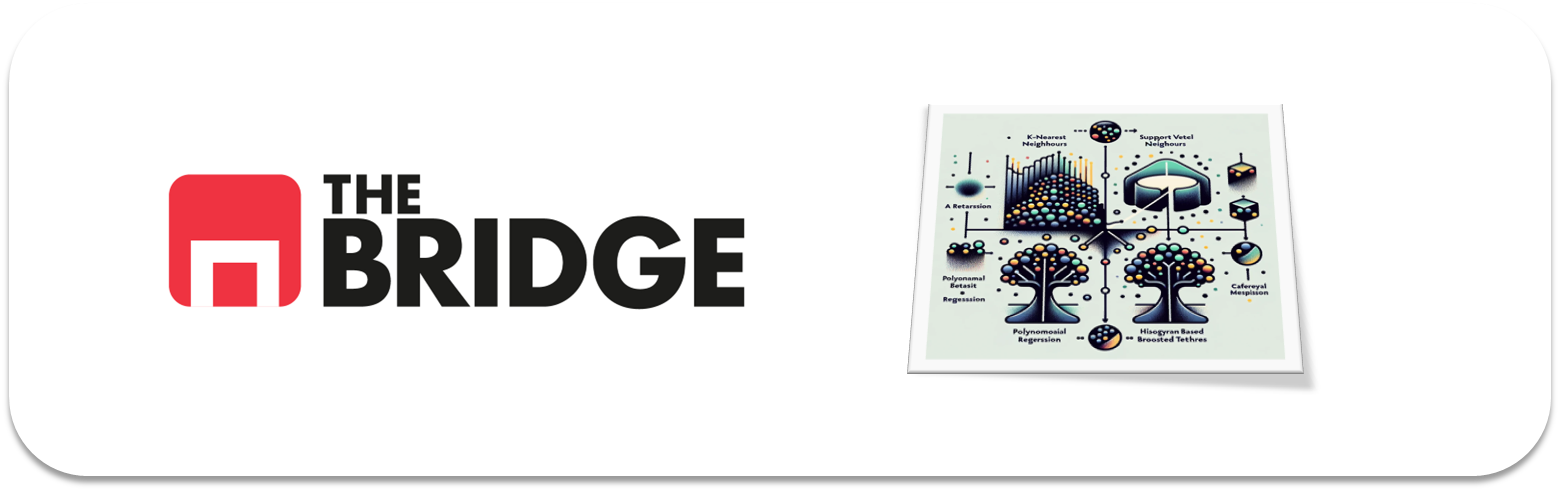

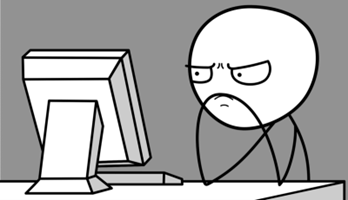

Para ejercitarte y afianzar lo aprendido sobre **Etapas Adicionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Mejora características de impresión
from pprint import pprint

# Tratamiento de variables categóricas
from sklearn.preprocessing import OrdinalEncoder
pd.get_dummies # para one-hot encoding

# Tratamiento variables numéricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Separación df
from sklearn.model_selection import train_test_split

# Evaluación regresión lineal
from sklearn import linear_model, metrics, model_selection
from sklearn.model_selection import cross_val_score

# Regularización
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Evaluación regresión logística
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error



# Entrenamiento modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

# Hacer 'x' subconjuntos de 'y' elementos
from sklearn.model_selection import StratifiedShuffleSplit

# Acumular los resultados de la evaluación 'accuracy' en una lista
from sklearn.metrics import accuracy_score
# Representar el árbol de forma visual
from sklearn.tree import plot_tree

# Optimización hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Ensamblados
from sklearn.ensemble import RandomForestClassifier # Clasificación
from sklearn.ensemble import RandomForestRegressor # Regresión
from sklearn.ensemble import AdaBoostClassifier # Clasificación
from sklearn.ensemble import AdaBoostRegressor # Regresión
from sklearn.ensemble import GradientBoostingRegressor # Regresión
from sklearn.ensemble import GradientBoostingClassifier # Clasificación
from xgboost import XGBRFRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostClassifier

# Otros modelos supervisados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC # "support vector classifier"
from sklearn.svm import SVR # "support vector regressor"

# Para diferentes gráficos
from sklearn.pipeline import make_pipeline 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# Obtener todas las métrica que acepta "scoring"
from sklearn.metrics import get_scorer_names # y se pone get_scorer_names()


# Equilibrado de clases
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

from toolbox_ML import *



### #1 Equilibrado de Datasets

### Ejercicio 1

Carga el dataset de los diamantes (está en el directorio "data") preparado ya para poder entrenar un modelo de clasificación. Muestra las primeras 7 filas y observa el listado de columnas. Muestra la distribución del potencial target ("cut") que ya conoces. ¿Está desbalanceada?

In [42]:
df = pd.read_csv('./data/diamonds_preparado.csv', sep='|')
df.head(7)

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.24,Very Good,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0.24,Very Good,62.3,57.0,336,3.95,3.98,2.47,0,0,...,1,0,0,1,0,0,0,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_D       53940 non-null  int64  
 9   color_E       53940 non-null  int64  
 10  color_F       53940 non-null  int64  
 11  color_G       53940 non-null  int64  
 12  color_H       53940 non-null  int64  
 13  color_I       53940 non-null  int64  
 14  color_J       53940 non-null  int64  
 15  clarity_IF    53940 non-null  int64  
 16  clarity_VVS1  53940 non-null  int64  
 17  clarity_VVS2  53940 non-null  int64  
 18  clarity_VS1   53940 non-nu

In [44]:
describe_df(df).T

,DATE_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
carat,float64,0.0,273,0.51
cut,object,0.0,5,0.01
depth,float64,0.0,184,0.34
table,float64,0.0,127,0.24
price,int64,0.0,11602,21.51
x,float64,0.0,554,1.03
y,float64,0.0,552,1.02
z,float64,0.0,375,0.7
color_D,int64,0.0,2,0.0
color_E,int64,0.0,2,0.0


In [45]:
tipifica_variables(df,10,30)

,nombre_variable,tipo_sugerido
0,carat,Numérica Discreta
1,cut,Categórica
2,depth,Numérica Discreta
3,table,Numérica Discreta
4,price,Numérica Discreta
5,x,Numérica Discreta
6,y,Numérica Discreta
7,z,Numérica Discreta
8,color_D,Binaria
9,color_E,Binaria


<Axes: >

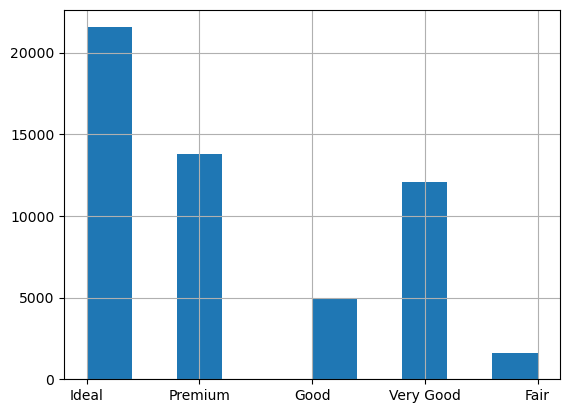

In [46]:
df['cut'].hist()

 ### Ejercicio 2

 Crea un train_set y un test_set al 20%, crea los pares X,y de train y test con el target en la variable "cut", considera el resto como features.

In [47]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

X_train = train_set.drop(columns = 'cut')
y_train = train_set['cut']
X_test = test_set.drop(columns = 'cut')
y_test = test_set['cut']

### Ejercicio 3

Instancia un modelo RandomForest con max_depth a 5 y sin tocar otro hiperparámetro, entrénalo con el X_train y el y_train. Y muestra el classification_report para el X_train.

In [48]:
rf = RandomForestClassifier(max_depth=5,random_state=42)

rf.fit(X_train,y_train)

y_perdict = rf.predict(X_train)
print(classification_report(y_train,y_perdict))

              precision    recall  f1-score   support

        Fair       0.89      0.66      0.76      1275
        Good       0.81      0.35      0.49      3902
       Ideal       0.78      0.94      0.85     17259
     Premium       0.59      0.87      0.70     11016
   Very Good       0.63      0.22      0.33      9700

    accuracy                           0.70     43152
   macro avg       0.74      0.61      0.63     43152
weighted avg       0.70      0.70      0.66     43152



### Ejercicio 4

Dado el desbalanceo, nos queremos fijar en el recall medio (la media del recall considerando cada clase). Usando "cross_val_score", hagamos una estimación un poco más precisa (y en general pesimista) de cual sería ese recall medio del modelo en general. Asigna para ello a `scoring` el valor `balanced_accuracy`

In [49]:

scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring='balanced_accuracy')
avg_balanced_accuracy = np.mean(scores)

print("Precisión balanceada media:", avg_balanced_accuracy)


Precisión balanceada media: 0.6024255909998344


### Ejercicio 5

El resultado obtenido en el ejercicio 4 es bueno o malo dependiendo de lo que "Negocio" nos diga. Supón que negocio nos dice que quiere como mínimo que cada clase tenga un 50% de recall (que al menos un 50% de cada clase de diamente se etiquete bien por el modelo). Viendo el report anterior seguro que ves que así no llegamos. Tenemos que hacer algo, ayudar al modelo a conseguir ese objetivo. ¿Cómo? Con las téncias de equilibrado. Empecemos por aumentar las clases minoritarias con SMOTE. 

Crea un X_train y un y_train balanceados aplicando SMOTE; muestra el reparto del y_train para ver que se ha balanceado en todas las clases

In [50]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
y_train_smote.value_counts()

cut
Good         17259
Very Good    17259
Premium      17259
Ideal        17259
Fair         17259
Name: count, dtype: int64

### Ejercicio 6

Entrena con el nuevo X,y y muestra los resultados del modelo así entrenado pero prediciendo contra el X_test creado en el ejercicio 2. Comenta el resultado. NOTA: En el caso de querer balancear con tecnicas de Oversampling y Undersampling, es interesante crear un set de validación adicional al de test y train, para no tener que usar el test como validación de los modelos.

In [51]:
rf_smote = rf.fit(X_train_smote,y_train_smote)

y_predict = rf_smote.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

        Fair       0.88      0.80      0.84       335
        Good       0.50      0.68      0.57      1004
       Ideal       0.77      0.94      0.85      4292
     Premium       0.61      0.82      0.70      2775
   Very Good       0.64      0.06      0.11      2382

    accuracy                           0.68     10788
   macro avg       0.68      0.66      0.61     10788
weighted avg       0.68      0.68      0.62     10788



El resultado ha mejorado en general pero el recall de la variable "Very good" está incluso por debajo que antes.

### Ejercicio 7

Prueba ahora a mejorar el modelo empleando el hiperparámetro class_weight. Reinstancia el modelo, entrenalo contra el X_train inicial y luego muestra el report contra el test. Comenta brevemente el resultado.

In [52]:
rf_cw = RandomForestClassifier(class_weight='balanced',random_state=42)

rf_cw.fit(X_train,y_train)
y_predict_cw=rf_cw.predict(X_test)
print(classification_report(y_test,y_predict_cw))

              precision    recall  f1-score   support

        Fair       0.91      0.89      0.90       335
        Good       0.75      0.67      0.71      1004
       Ideal       0.82      0.92      0.87      4292
     Premium       0.73      0.80      0.77      2775
   Very Good       0.64      0.45      0.53      2382

    accuracy                           0.76     10788
   macro avg       0.77      0.75      0.75     10788
weighted avg       0.75      0.76      0.75     10788



Da mejor resultado así que con el CV y el SMOTE, si bien no se llega al 50% mínimo de recall en cada una de las variables que se solicitaba

### Ejercicio 8

Para terminar con nuestros intentos de mejorar la clasificación "global", vamos a aplicar el bajomuestreo de las clases mayoritarias, aunque no tengamos muchas esperanzas puestas en ello. Para poder hacerlo vamos a usar la clase `RandomUnderSampler` de la biblioteca imblearn. Investiga un poco sobre su funcionamiento (pista es equivalente en su uso a la clase Smote) y crea un dataset con undersampling de forma que las clases estén equilibradas. Muestra las frecuencias del target. ¿Por qué no tenemos muchas expectativas, en este caso, sobre esta técnica? 

In [53]:

rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_train_rus.value_counts(normalize = True)

cut
Fair         0.2
Good         0.2
Ideal        0.2
Premium      0.2
Very Good    0.2
Name: proportion, dtype: float64

Porque lo ha reducido mucho

### Ejercicio 9

Entrena, ahora con class_weight a None, un RandomForest como el inicial pero contra el train creado en el ejercicio 8, muestra su informe de clasificación sobre la predicción contra test y comenta el resultado.

In [54]:
rf_rus = RandomForestClassifier(random_state=42)

rf_rus.fit(X_train_rus,y_train_rus)
y_predict = rf_rus.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

        Fair       0.81      0.92      0.86       335
        Good       0.57      0.77      0.65      1004
       Ideal       0.82      0.87      0.84      4292
     Premium       0.69      0.74      0.72      2775
   Very Good       0.52      0.33      0.41      2382

    accuracy                           0.71     10788
   macro avg       0.68      0.73      0.70     10788
weighted avg       0.70      0.71      0.70     10788



Empeora el recall obtenido con el class_weight

### #2 Análisis de Errores

### Ejercicio 10

Muestra la matriz de confusión con "ConfusionMatrixDisplay.from_predictions" para el clasificador entrenado con el hiperparámetro class_weight con el valor "balanced" (el del ejercicio 7). Asigna el valor "true" (ojo es un string, no el booleano True) al argumento normalize. Comenta que estamos viendo y hacia donde se dirigen los errores de clasificación de "Very Good"

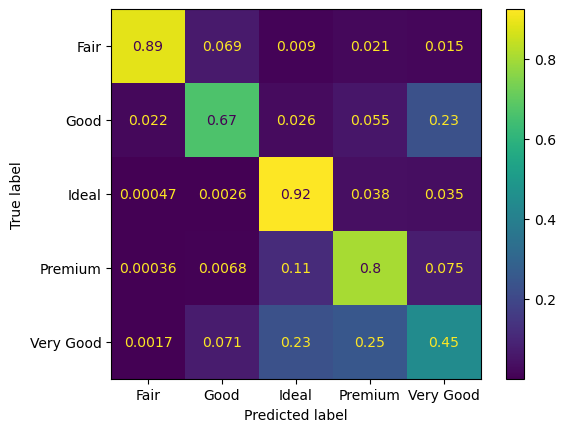

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_cw, normalize='true');


Se dirigen hacia 'premium' con un 25% y hacia 'ideal' con un 23%

### Ejercicio 11

Muestra ahora la matriz de confusión, empleando la misma función, pero esta vez enseñando los porcentajes de distribució de los errores en la predicción, para eso emplea normalize = "pred" como argumeto y date cuenta de que las columnas son las que ahora suman el 100%. Comenta el resultado respecto a "Premium" como predicción y a lo que se equivoca respecto a "Very Good". 

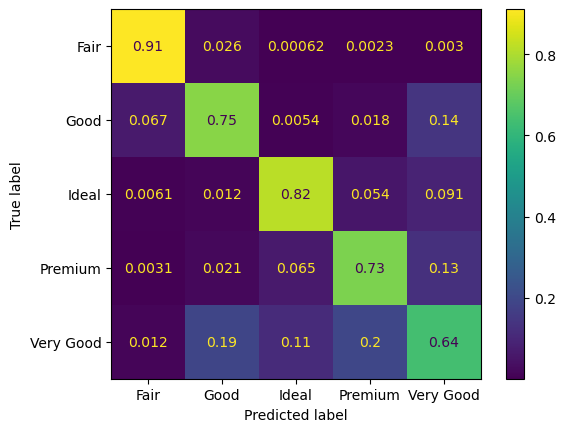

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_cw, normalize='pred');


Pues así, se cumple la condición de que todos los valores de la clase recall para cada una está por encima del 50% que se pedía.  
No sé cómo interpretarlo con respecto a la clase 'premium':  
- premium tiene un 13% de error hacia 'very good' 
- very good tiene un 20% de error hacia premium

### Ejercicio 12

Dada la relación entre los errores de "Very Good" y "Prediction" que puedes haber observado en los ejercicios anteriores, una posible mejora es introducir un modelo que corrija esos errores, pero esa es la filosofía de los Gradient Boosted Trees. Provemos esa línea: Entrena un CatBoost con los hiperparámetros ajustados para que no emplee más de 5 niveles en sus árboles intermedios y para que balanceé las clases.

1. Obtener el "balanced_accuracy" primero con una validación cruzada.
2. Evaluálo después de contra el test.

In [63]:
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)

param_grid= {'depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.4, 0.8],
          'colsample_bylevel': [0.5,1,2],
          'iterations': [250,500,1000,2000],
          "border_count": [125,250]
          }


cat_grid = RandomizedSearchCV(cat_clf, 
                               cv = 3,
                               n_iter = 3,
                               param_distributions= param_grid, 
                               scoring = "balanced_accuracy")


cat_grid.fit(X_train, y_train)
y_predict_cat = cat_grid.predict(X_test)
print(classification_report(y_test,y_predict_cat))





              precision    recall  f1-score   support

        Fair       0.92      0.90      0.91       335
        Good       0.80      0.69      0.74      1004
       Ideal       0.82      0.92      0.87      4292
     Premium       0.80      0.82      0.81      2775
   Very Good       0.69      0.56      0.62      2382

    accuracy                           0.79     10788
   macro avg       0.81      0.78      0.79     10788
weighted avg       0.79      0.79      0.79     10788



In [64]:
print(cat_grid.best_params_)

{'learning_rate': 0.4, 'iterations': 250, 'depth': 6, 'colsample_bylevel': 0.5, 'border_count': 250}


Con este modelo Cat Boost Classifier se cumple con la métrica pedida desde negocio de tener al menor un 50% de recall en todas las clases.

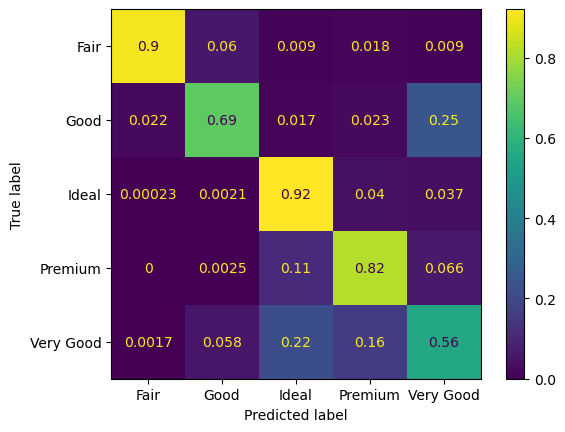

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_cat, normalize='true');

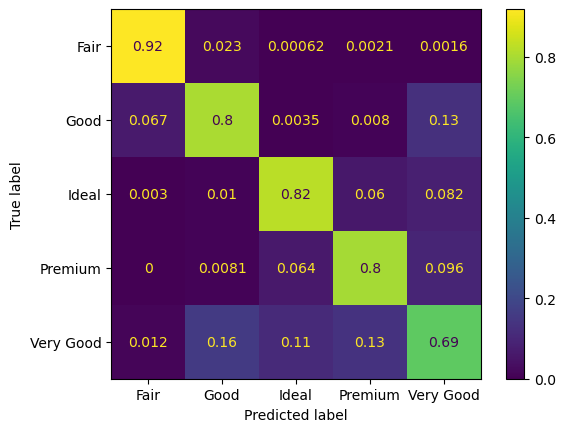

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_cat, normalize='pred');